In [5]:
import os 
import sys
sys.path.append("..")
os.chdir("..")

In [6]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import duckdb
import numpy as np

transaction_df = pd.read_csv("data/dh_transactions.csv")
product_df = pd.read_csv("data/dh_product_lookup.csv")
causal_df = pd.read_csv("data/dh_causal_lookup.csv")
store_df = pd.read_csv("data/dh_store_lookup.csv")

## Suggestion
- The dataset should contain weekday, holiday. Since most of experiments prove that they are strong factors to predict the sales. All author needs to inform us is start collecting date, we can then map back

- Which promotion is not effective

- Is their last transaction time related to their churn rate

In [ ]:
household_df = transaction_df.groupby("household").aggregate(
    recency = ("day","max")
)

# See how many people churn 

### Here's another interesting you better clean
- Let's take a look at the unique product_size 

In [1916]:
# top 1 product_size 
fill_unknown_value='16 OZ'

unique_size_dict : Dict[str,int] = dict(product_df.product_size.value_counts())
unique_size_list : List[str] = list(unique_size_dict.keys())
print("Not-clean unique_size_list : ")
print(unique_size_list)


clean_unique_size_list = clean_unique_size_from_product_df(unique_size_list,fill_unknown_value)
print("\n Clean unique_size_list : ")
print(clean_unique_size_list)
print("\n Unique Measurement unit : ")
unique_measurement_unit = [clean.split(" ")[1] for clean in clean_unique_size_list]
print(set(unique_measurement_unit))

# Now we will 

Not-clean unique_size_list : 
['16 OZ', '26 OZ', '12 OZ', '24 OZ', '8 OZ', '32 OZ', '1 LB', '10 OZ', '7 OZ', '48 OZ', '17 OZ', '2 LB', '16    OZ', '26    OZ', '15 OZ', '13.25 OZ', '25 OZ', '14 OZ', '10OZ', '##########', '26.5 OZ', '27.5 OZ', '8.5 OZ', '25.5 OZ', '27.75 OZ', '6.3 OZ', '27.6 OZ', '6 OZ', '4 LB', 'P    24 OZ', '26.3 OZ', '36 OZ', '17.5 OZ', '13 OZ', '8.8 OZ', '10.5 OZ', '26.50 OZ', '23 OZ', 'P     1 LB', 'P    12 OZ', '12 OUNCE', '24    OZ', '17.6 OZ', ' ', '6.75 OZ', '7    OZ', '24 FL OZ', '28 OZ', '28    OZ', '25.75 OZ', '25.6 OZ', '12.5 OZ', '45 OZ PET', '11.6', '45 OZ', '15.5 OZ', '12.7 OZ', '32OZ', '36    OZ', 'N     1 LB', '5 OZ', '37 OZ', '16OZ', '5.5 OZ', '31.5 OZ', '16  OZ', '19 OZ', 'CR   16 OZ', 'P    16 OZ', '10.6 OZ', '16.9 OZ', '%KH# 9390', '1.1 OZ', '.50 OZ', '26 OZ.', '2.8 OZ', 'P    25 OZ', '24 OUNCE', 'KH# 18283', '8 OUNCE', 'KH# 20749', 'N    16 OZ', '16.00  OZ', 'KH# 18280', 'CUST REQST', 'KH# 18277', '16 OUNCE', 'N     7 OZ', '3 LB', '36 OZ.', '26 OUN

In [1921]:
def lb_to_oz(value):
    return value * 16

def extract_and_convert_to_oz(clean_unique_size:List[str]):
    if 'LB' in clean_unique_size:
        value = float(clean_unique_size.split()[0])
        value = lb_to_oz(value)
    else:
        value = float(clean_unique_size.split()[0])
    return value

weights_in_oz = [extract_and_convert_to_oz(clean) for clean in clean_unique_size_list]
weights_in_oz

[16.0,
 26.0,
 12.0,
 24.0,
 8.0,
 32.0,
 16.0,
 10.0,
 7.0,
 48.0,
 17.0,
 32.0,
 16.0,
 26.0,
 15.0,
 13.25,
 25.0,
 14.0,
 10.0,
 16.0,
 26.5,
 27.5,
 8.5,
 25.5,
 27.75,
 6.3,
 27.6,
 6.0,
 64.0,
 24.0,
 26.3,
 36.0,
 17.5,
 13.0,
 8.8,
 10.5,
 26.5,
 23.0,
 16.0,
 12.0,
 12.0,
 24.0,
 17.6,
 16.0,
 6.75,
 7.0,
 16.0,
 28.0,
 28.0,
 25.75,
 25.6,
 12.5,
 45.0,
 16.0,
 45.0,
 15.5,
 12.7,
 32.0,
 36.0,
 16.0,
 5.0,
 37.0,
 16.0,
 5.5,
 31.5,
 16.0,
 19.0,
 16.0,
 16.0,
 10.6,
 16.9,
 16.0,
 1.1,
 50.0,
 26.0,
 2.8,
 25.0,
 24.0,
 16.0,
 8.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 7.0,
 48.0,
 36.0,
 26.0,
 6.5,
 16.0,
 14.0,
 16.0,
 16.0,
 16.0,
 16.0,
 20.0,
 2.5,
 13.0,
 16.0,
 8.0,
 9.0,
 16.0,
 16.0,
 16.0,
 3.5,
 16.0,
 16.0,
 16.0,
 17.7,
 16.0,
 24.0,
 40.0,
 16.0,
 2.0,
 10.0,
 48.0,
 24.0,
 32.0,
 2.0,
 25.3,
 45.0,
 45.0,
 16.0,
 16.0,
 67.0,
 23.0,
 96.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 7.75,
 67.0,
 14.5,
 24.0,
 27.5,
 7.25,
 16.0,
 48.0,
 16.0,
 1

In [1920]:
def clean_product_size(item,fill_unknown_value='16 OZ'):
    oz_lb_pattern = re.compile(r'(\d+(\.\d+)?)\s*(OZ|LB|OUNCE)', re.IGNORECASE)
    
    # Clean 
    match = oz_lb_pattern.search(item)
    if match:
        value = f"{match.group(1)} {match.group(3).upper()}"
    else:
        value = f"{fill_unknown_value}"  # Filling with the mode value if pattern not matched
    
    # Convert to OZ
    if 'LB' in value:
        value = float(value.split()[0])
        # LB TO OZ size
        value *= 16
    else:
        value = float(value.split()[0])
    
    return value

In [1923]:
product_df['product_size_oz'] = product_df['product_size'].apply(clean_product_size)

<Figure size 1000x600 with 0 Axes>

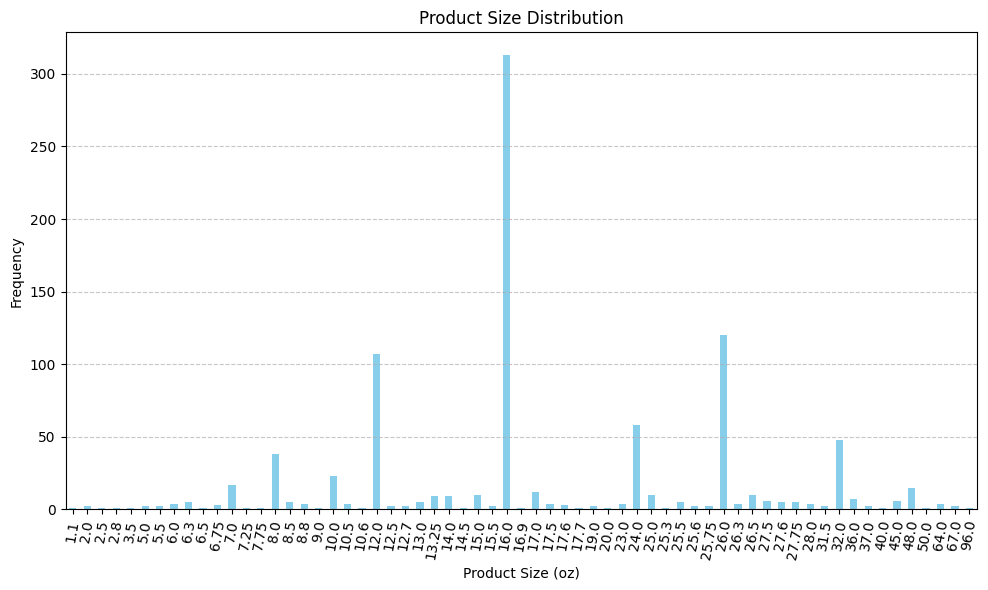

In [1941]:
plt.figure(figsize=(10, 6))
# product_df.product_size_oz.value_counts()

product_size_oz = product_df.product_size_oz.value_counts().sort_index()

# Plotting histogram
plt.figure(figsize=(10, 6))
product_size_oz.plot(kind='bar', color='skyblue')
plt.title('Product Size Distribution')
plt.xlabel('Product Size (oz)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

- Here's the temporary clean way, we just replace the unclear size with the mode with 16 OZ. Soon, we will find which product often have unknown unit, so, we can further ask the people in that shop about the product_size of that product

- Which store has the lowest time-transaction

### Which promotion does attract potential customer the most
- Another interesting insight is which promotion could attract the new customer the most.

In [7]:
min_causal_week : int = causal_df.week.min()
print(f"Start week of causal promotion : {causal_df.week.min()}")

transaction_df_with_causal = transaction_df.query(f"week >= {min_causal_week}")

Start week of causal promotion : 43


In [12]:
first_buy_transaction_df = transaction_df_with_causal.drop_duplicates(subset="household")

In [15]:
new_customer_store_df = first_buy_transaction_df.groupby(["store","week"]).aggregate(customer_count = ("household","count")).reset_index()

In [28]:
new_customer_store_df.sort_values("customer_count",ascending=False,inplace=True)
new_customer_store_df

,store,week,customer_count
16132,270,43,178
19296,322,43,178
22271,371,44,173
19545,326,44,162
4256,71,43,161
...,...,...,...
18355,305,100,1
9066,150,86,1
18737,312,101,1
21642,360,97,1


In [24]:
causal_feat_mapper = causal_df[["store","week","feature_desc"]]
causal_feat_mapper

,store,week,feature_desc
0,1,68,Wrap Interior Feature
1,1,66,Wrap Back Feature
2,1,72,Interior Page Feature
3,1,55,Wrap Interior Feature
4,1,68,Wrap Interior Feature
...,...,...,...
351367,387,101,Wrap Front Feature
351368,387,101,Wrap Front Feature
351369,387,104,Interior Page Feature
351370,387,104,Interior Page Feature


In [40]:
joined_df = pd.merge(new_customer_store_df, causal_feat_mapper, on=['store', 'week'])

joined_df

,store,week,customer_count,feature_desc
0,270,43,178,Not on Feature
1,270,43,178,Front Page Feature
2,270,43,178,Front Page Feature
3,270,43,178,Not on Feature
4,270,43,178,Not on Feature
...,...,...,...,...
350966,360,101,1,Not on Feature
350967,360,101,1,Not on Feature
350968,360,101,1,Not on Feature
350969,360,101,1,Not on Feature


In [46]:
promotion_report = joined_df.groupby("feature_desc").aggregate(
                            new_customer_count=("customer_count","count"),
                            new_customer_min=("customer_count","min"),
                            new_customer_max=("customer_count","max"),
                            new_customer_mean=("customer_count","mean")
                        )

In [52]:
promotion_report

,feature_desc,new_customer_count,new_customer_min,new_customer_max,new_customer_mean
0,Back Page Feature,7389,1,34,11.369739
1,Front Page Feature,34018,1,178,27.579223
2,Interior Page Feature,192709,1,161,21.321298
3,Interior Page Line Item,6001,3,54,22.931845
4,Not on Feature,78890,1,178,18.276816
5,Wrap Back Feature,5004,1,60,16.247402
6,Wrap Front Feature,4757,1,50,14.163128
7,Wrap Interior Feature,22203,1,57,16.610773


In [50]:
promotion_report = promotion_report.reset_index()
feature_descs = promotion_report["feature_desc"]
new_customer_counts = promotion_report["new_customer_count"]
new_customer_mins = promotion_report["new_customer_min"]
new_customer_maxs = promotion_report["new_customer_max"]
new_customer_means = promotion_report["new_customer_mean"]

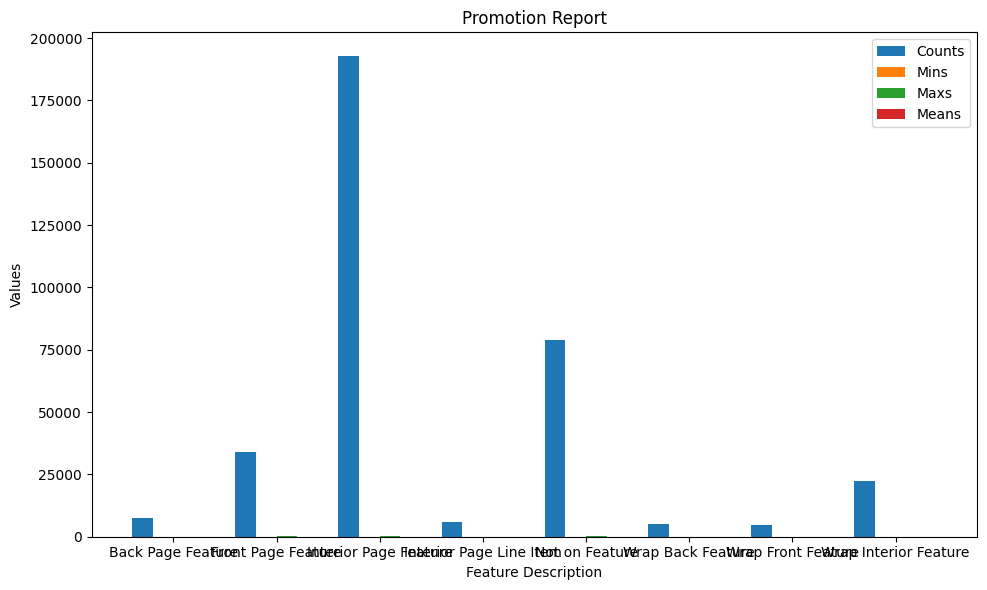

In [51]:
# Number of groups
num_groups = len(feature_descs)

# Width of each bar
bar_width = 0.2

# Index for x-axis
index = np.arange(num_groups)

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(index, new_customer_counts, bar_width, label='Counts')
plt.bar(index + bar_width, new_customer_mins, bar_width, label='Mins')
plt.bar(index + 2*bar_width, new_customer_maxs, bar_width, label='Maxs')
plt.bar(index + 3*bar_width, new_customer_means, bar_width, label='Means')

plt.xlabel('Feature Description')
plt.ylabel('Values')
plt.title('Promotion Report')
plt.xticks(index + 1.5*bar_width, feature_descs)
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, new_customer_min, width, label='Min')
rects2 = ax.bar(x, new_customer_max, width, label='Max')
rects3 = ax.bar(x + width, new_customer_mean, width, label='Mean')
rects4 = ax.bar(x + 2*width, new_customer_count, width, label='Count')

# Add labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('New Customer Statistics by Feature Description')
ax.set_xticks(x)
ax.set_xticklabels(feature_desc, rotation=45, ha='right')
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

,new_customer_count,new_customer_min,new_customer_max,new_customer_mean
feature_desc,,,,
Back Page Feature,7389,1,34,11.369739
Front Page Feature,34018,1,178,27.579223
Interior Page Feature,192709,1,161,21.321298
Interior Page Line Item,6001,3,54,22.931845
Not on Feature,78890,1,178,18.276816
Wrap Back Feature,5004,1,60,16.247402
Wrap Front Feature,4757,1,50,14.163128
Wrap Interior Feature,22203,1,57,16.610773


In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, new_customer_min, width, label='Min')
rects2 = ax.bar(x, new_customer_max, width, label='Max')
rects3 = ax.bar(x + width, new_customer_mean, width, label='Mean')
rects4 = ax.bar(x + 2*width, new_customer_count, width, label='Count')

# Add labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('New Customer Statistics by Feature Description')
ax.set_xticks(x)
ax.set_xticklabels(feature_desc, rotation=45, ha='right')
ax.legend()

# Function to add labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

In [44]:
joined_df.groupby("feature_desc").aggregate(count=("customer_count","mean"))

,count
feature_desc,
Back Page Feature,11.369739
Front Page Feature,27.579223
Interior Page Feature,21.321298
Interior Page Line Item,22.931845
Not on Feature,18.276816
Wrap Back Feature,16.247402
Wrap Front Feature,14.163128
Wrap Interior Feature,16.610773


In [37]:
new_customer_store_df.merge(causal_feat_mapper,on=("store","week"),how='inner')

,store,week,customer_count,feature_desc
0,270,43,178,Not on Feature
1,270,43,178,Front Page Feature
2,270,43,178,Front Page Feature
3,270,43,178,Not on Feature
4,270,43,178,Not on Feature
...,...,...,...,...
350966,360,101,1,Not on Feature
350967,360,101,1,Not on Feature
350968,360,101,1,Not on Feature
350969,360,101,1,Not on Feature
